In this notebook, we perform a quick demonstration of using archeo to analyze the GW190521 event, **assuming the primary black hole is a third generation black hole (yield from a previous merge of one second generation black hole and one first generation black hole)**. Again, similar to `gw190521_quick.ipynb`, we will use a subsampled version of the LVK posterior samples for GW190521 as our input data.
 The full dataset can be found [dcc.ligo](https://dcc.ligo.org/P2000158/public).

 The notebook run should take less than 5 minute to complete.

In [1]:
import pandas as pd
import archeo
from archeo.schema import Domain, PriorConfig
from archeo.core.simulator import Simulator

In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Prepare Prior

For the 2g1g analysis, we will assume all hierarchical mergers undergo a generice spin setting including precession, similar to PPq6 in [Araújo Álvarez et al., 2024](https://iopscience.iop.org/article/10.3847/1538-4357/ad90a9). Note that we assume the first generation black hole mass range is in [5, 65] solar masses based on PISN gap in [65, 130] solar masses. You may feel free to modify the upper limit based on your own assumptions.

In [3]:
prior_config = PriorConfig(
    n_samples=5000,
    is_spin_aligned=False,
    m_1=Domain(5, 65),
    m_2=Domain(5, 65),
    a_1=Domain(0, 1.0),
    a_2=Domain(0, 1.0),
)
simulator = Simulator(prior_config=prior_config)

# Generate a 2g prior
prior_2g = archeo.Prior.from_simulator(simulator)

# Here we use sample from the 2g prior for the primary black hole
simulator.use_remnant_results(df_bh1=prior_2g)
prior_2g1g = archeo.Prior.from_simulator(simulator)

Loaded NRSur7dq4Remnant fit.


100%|██████████| 5000/5000 [00:30<00:00, 166.48it/s]
Using remnant results for black hole 1. This will override the prior configuration for black hole 1.
100%|██████████| 5000/5000 [00:30<00:00, 165.08it/s]


## Verify Distribution in Priors

Here we quickly visualize the remnant mass and spin distributions of the 2g prior and the primary black hole mass and spin distributions of the 1g prior to ensure they are as expected.

We will also visualize the remnant mass and spin distributions of the 2g1g prior to make a sense of what is happening.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from archeo.visualization.base import plot_pdf

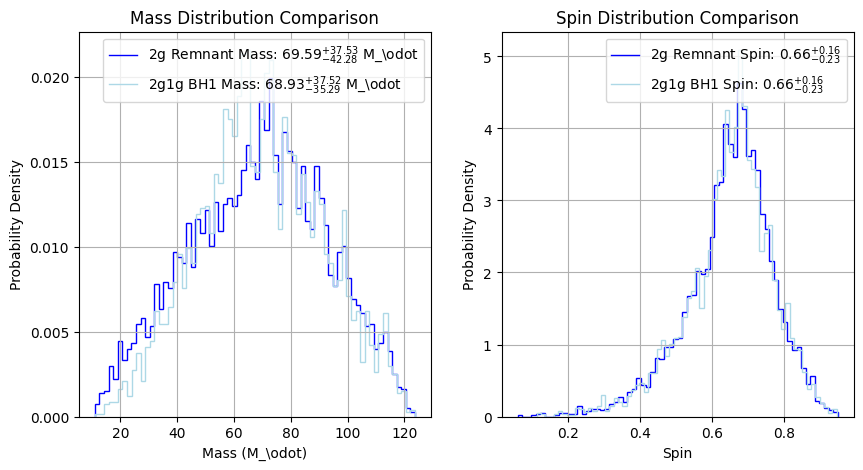

In [5]:
# Verify Distribution in Priors

# Here the distributions should be fairly close to each other
#   since we are using the 2g prior samples
#   for the primary black hole in the 2g1g prior.
# However, the sample size is small so there will be some noise.

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_pdf(axes[0], prior_2g["m_f"], "blue", name="2g Remnant Mass", unit="M_\odot")
plot_pdf(axes[0], prior_2g1g["m_1"], "lightblue", name="2g1g BH1 Mass", unit="M_\odot")

plot_pdf(axes[1], prior_2g["a_f"], "blue", name="2g Remnant Spin")
plot_pdf(axes[1], prior_2g1g["a_1"], "lightblue", name="2g1g BH1 Spin")

for i in range(2):
    axes[i].set_title(
        "{param} Distribution Comparison".format(param="Mass" if i == 0 else "Spin")
    )
    axes[i].set_ylabel("Probability Density")
    axes[i].set_xlabel("Mass (M_\odot)" if i == 0 else "Spin")
    axes[i].grid()
    axes[i].legend()

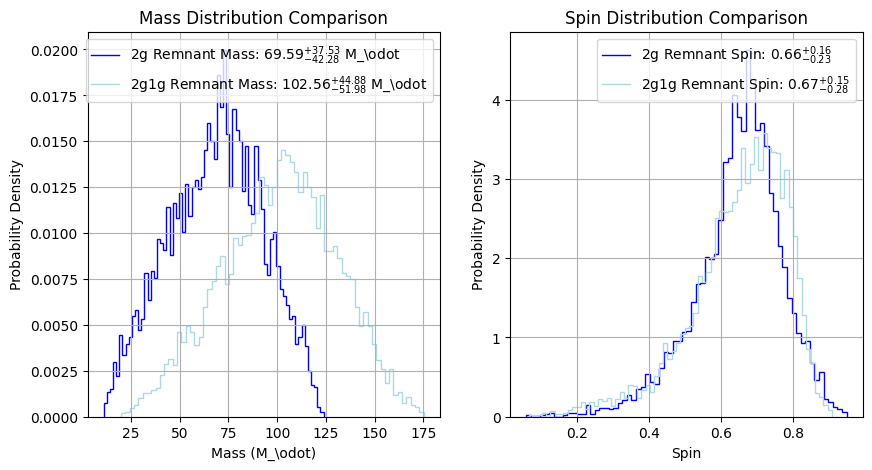

In [6]:
# Understand the remnant mass and spin distributions of the 2g1g prior
# Here we should at least see the remnant mass distribution shifted to higher masses
#   compared to the 2g prior since the primary black hole is more massive on average.

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_pdf(axes[0], prior_2g["m_f"], "blue", name="2g Remnant Mass", unit="M_\odot")
plot_pdf(axes[0], prior_2g1g["m_f"], "lightblue", name="2g1g Remnant Mass", unit="M_\odot")

plot_pdf(axes[1], prior_2g["a_f"], "blue", name="2g Remnant Spin")
plot_pdf(axes[1], prior_2g1g["a_f"], "lightblue", name="2g1g Remnant Spin")

for i in range(2):
    axes[i].set_title(
        "{param} Distribution Comparison".format(param="Mass" if i == 0 else "Spin")
    )
    axes[i].set_ylabel("Probability Density")
    axes[i].set_xlabel("Mass (M_\odot)" if i == 0 else "Spin")
    axes[i].grid()
    axes[i].legend()

## Load Parameter Estimation Samples

Here the steps are identical to those in `gw190521_quick.ipynb`.

In [7]:
# This data file is a subset of the LVK posterior samples for GW190521
# For the full dataset, please refer to: https://dcc.ligo.org/P2000158/public

gw190521_pe_samples = pd.read_json("./gw190521_lvk_subsampled.json")
gw190521_pe_samples.head(10)

,mass_1_source,mass_2_source,a_1,a_2
0,84.513663,76.297304,0.687007,0.899445
1,81.059729,69.663127,0.769092,0.878550
2,92.370429,86.105830,0.540142,0.949552
3,77.363091,67.721241,0.088123,0.973257
4,99.454443,41.802952,0.710768,0.976182
5,89.774109,72.749785,0.096520,0.859641
6,65.693613,63.273635,0.664623,0.867052
7,85.314123,58.547913,0.604760,0.867737
8,88.031480,85.329605,0.741590,0.659539
9,71.147886,65.844700,0.914395,0.073000


In [8]:
ancestors_bh1 = prior_2g1g.to_posterior(
    mass_posterior=gw190521_pe_samples["mass_1_source"],
    spin_posterior=gw190521_pe_samples["a_1"],
)
ancestors_bh1.head(10)

100%|██████████| 5000/5000 [00:12<00:00, 415.80it/s]


2025-11-09T18:59:07Z [archeo.core.prior | WARNING]: 1198 / 5000 samples could not be recovered from the prior.


,m_1,m_2,k_1,k_2,m_ret,m_ret_err,v_f,v_f_err,chi_1,chi_2,...,k_f,a_f,a_1,a_2,chi_eff,chi_p,min_v_esc,l,original_a_f,original_m_f
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.109709,82.082266
1,71.204425,14.172562,511.298051,0.0,0.986825,0.000587,"[7.5903675243773e-05, -0.0008879776145372901, ...","[0.00014828238687034746, 0.0001497023364278512...","(-0.22962292543145948, 0.18923465380194923, -0...","(-0.692094664725603, -0.5685079031773203, 0.05...",...,291.832195,0.197302,0.749118,0.897049,-0.565064,0.297551,511.298051,0.0002,0.169938,83.604518
2,41.798804,38.104399,674.616908,0.0,0.939449,0.000183,"[0.0006271178398085629, 0.00016146637348435014...","[5.096434506665966e-05, 6.251237321650113e-05,...","(0.4147125140140576, 0.021600654003196162, 0.4...","(0.0727494346633167, 0.8337288563262304, 0.229...",...,321.134549,0.814320,0.616334,0.867669,0.347462,0.752915,674.616908,0.0038,0.807190,75.441391
3,50.507383,22.451255,362.878616,0.0,0.969660,0.000087,"[0.0014499279819373398, -0.0009111670299297066...","[2.0289826974228573e-05, 1.748300030207926e-05...","(-0.5625824679056167, 0.06230631454234143, -0....","(-0.009343606533680288, 0.0034809432290475177,...",...,661.840744,0.492061,0.751053,0.013297,-0.344454,0.566022,661.840744,0.0016,0.494414,71.471027
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.974215,115.865872
5,84.277370,17.355203,208.053391,0.0,0.984789,0.000416,"[0.0003105909843097801, -0.0008690588951589406...","[0.00010534579423901051, 0.0001212424903728573...","(0.3072498181343961, -0.32464529461055314, -0....","(-0.2777779160223119, 0.715878211226382, -0.33...",...,328.867471,0.345211,0.571569,0.836306,-0.351968,0.446987,328.867471,0.0012,0.376884,100.479834
6,57.089193,49.594165,164.258957,0.0,0.937479,0.000083,"[0.0003466309483827004, 0.00040668094931714836...","[1.4162724964236232e-05, 1.419280812576271e-05...","(0.33714705764251524, 0.17799102072936085, 0.5...","(-0.29616105325939884, 0.04230318195360705, 0....",...,1568.153566,0.800019,0.634804,0.406838,0.399785,0.381247,1568.153566,0.0092,0.771864,100.390105
7,62.935393,15.198522,132.826262,0.0,0.974628,0.000191,"[2.1873143343116184e-05, 0.0008407952109766869...","[4.9607558302975683e-05, 7.098371598370049e-05...","(-0.22549971550134082, 0.6496014246533328, 0.1...","(0.2386396585161865, 0.5020823482039425, 0.004...",...,252.228712,0.681422,0.698088,0.555931,0.097930,0.687628,252.228712,0.0048,0.662558,75.773648
8,85.711153,34.348968,752.255824,0.0,0.974169,0.000097,"[0.0005376753721846334, -0.0009272148112844177...","[2.4228746611720418e-05, 2.211138176951283e-05...","(0.29498115199019936, -0.24524201316364277, -0...","(-0.3936951889300472, 0.21474684826698906, -0....",...,358.815577,0.376573,0.675051,0.588485,-0.505563,0.383611,752.255824,0.0006,0.340826,116.854193
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.078704,82.195220


## Visualize Inferred Posteriors of BH1's Ancestor

Here we just visualize the summary for convenience.

In [9]:
## Visualize Inferred Posteriors of BH1's Ancestor

from archeo.visualization.estimation import table_estimates

In [10]:
table_estimates(
    dfs={
        "Prior (Aligned Spin)": prior_2g1g,
        "GW190521 BH1 Ancestor": ancestors_bh1,
    }
)

,,Recovery Rate,p2g_GC,p2g_MW,p2g_NSC,p2g_EG,$m_1$,$m_2$,$q$,$m_f$,$a_f$,$v_f$,$\chi_{p}$,$\chi_{eff}$
0,Prior (Aligned Spin),NaN,0.08,21.54,40.34,43.58,$68.93_{-35.29}^{+37.52}$,$35.01_{-21.90}^{+26.09}$,$1.86_{-0.79}^{+3.07}$,$102.56_{-51.98}^{+44.88}$,$0.67_{-0.28}^{+0.15}$,$587.58_{-428.15}^{+1016.57}$,$0.55_{-0.32}^{+0.22}$,$-0.00_{-0.45}^{+0.45}$
1,GW190521 BH1 Ancestor,0.7604,0.04,24.50,41.74,45.68,$62.12_{-17.30}^{+19.55}$,$26.38_{-13.56}^{+19.61}$,$2.40_{-1.31}^{+3.00}$,$84.61_{-13.49}^{+20.35}$,$0.68_{-0.48}^{+0.20}$,$485.01_{-329.28}^{+1148.33}$,$0.47_{-0.32}^{+0.28}$,$0.05_{-0.61}^{+0.63}$
